
# Test dhole module with *"known"* large deviations




In [1]:
# load some modules
import pandas as pd
import numpy as np
from pygslib.drillhole import *   # here we are importing all the classes and functions in pygslib.drillhole
import matplotlib.pylab as plt
%matplotlib inline  

## Smooth regular change

   BHID  XCOLLAR  YCOLLAR  ZCOLLAR
0     1        0        0        0
   BHID  FROM  R_AZM      R_DIP  TO   xb_real       yb_real   zb_real
0     1     0      0  90.000000   1  0.000000  0.000000e+00  0.000000
1     1     1      1  89.749304   2  0.000000 -4.371139e-08 -1.000000
2     1     2      2  89.498607   3  0.000076  4.374690e-03 -1.999990
3     1     3      3  89.247911   4  0.000382  1.312024e-02 -2.999952
4     1     4      4  88.997214   5  0.001069  2.622832e-02 -3.999866
      AT   AZ  BHID        DIP
0      0    0     1  90.000000
50    50   50     1  77.465181
100  100  100     1  64.930362
150  150  150     1  52.395543
200  200  200     1  39.860724
250  250  250     1  27.325905
300  300  300     1  14.791086
350  350  350     1   2.256267


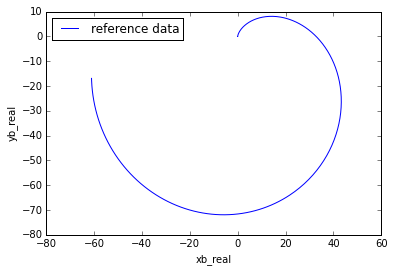

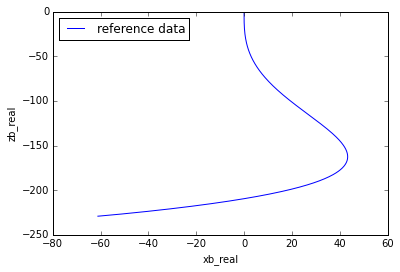

In [2]:
# create artificial "know data" to desurvey
DEG2RAD=3.141592654/180.0
azm= np.linspace(0.0,359.0,360)
dip= np.linspace(90,0,360)

#make sure BHID is string, XCOLLAR is float...
collar=pd.DataFrame({'BHID': [1],'XCOLLAR':[0.], 'YCOLLAR': [0.], 'ZCOLLAR':[0.]})
assay = pd.DataFrame({'BHID': np.ones([360], dtype = int),
                      'FROM':np.linspace(0,359,360), 
                      'TO': np.linspace(1,360,360), 
                      'R_AZM':azm,
                      'R_DIP':dip})

#assuming each 1m interval straight we calculate x,y,z
assay['xb_real']=np.zeros([360], dtype = float)
assay['yb_real']=np.zeros([360], dtype = float)
assay['zb_real']=np.zeros([360], dtype = float)

DEG2RAD=3.141592654/180.0
for i in range(1,360):
    x,y,z = ang2cart( assay['R_AZM'][i-1], assay['R_DIP'][i-1]) # this is for one unit length interval
    assay.loc[i, 'xb_real']= assay['xb_real'][i-1] + x
    assay.loc[i,'yb_real']= assay['yb_real'][i-1] + y
    assay.loc[i,'zb_real']= assay['zb_real'][i-1] + z

# create survey every 50m 
survey = pd.DataFrame({'BHID': assay['BHID'][::50],
                       'AT': assay['FROM'][::50],
                       'AZ': assay['R_AZM'][::50],
                       'DIP': assay['R_DIP'][::50]}) 
#print values 
print collar
print assay.head()
print survey

#plot drillhole
plt.plot (assay['xb_real'],assay['yb_real'], label= 'reference data')
plt.xlabel('xb_real')
plt.ylabel('yb_real')
plt.legend(loc=2)
plt.show()

plt.plot (assay['xb_real'],assay['zb_real'], label= 'reference data')
plt.xlabel('xb_real')
plt.ylabel('zb_real')
plt.legend(loc=2)
plt.show()


In [3]:
# creating a working Drillhole database. 
mydholedb=Drillhole(collar=collar,survey=survey)

In [4]:
# add assay table
mydholedb.addtable(assay, 'assay' ,overwrite = False)

## Validating the dataset

An error will be raised is there is anything wrong in the database. Z

In [5]:
mydholedb.validate()

In [6]:
mydholedb.validate_table('assay')

### Desurveying drillhole tables


In [7]:
mydholedb.desurvey('assay', endpoints=True)
mydholedb.table['assay'].head()

/home/adrian/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: UserWarning: 
 point beyond the last survey point at 7
  if __name__ == '__main__':


,BHID,FROM,R_AZM,R_DIP,TO,xb_real,yb_real,zb_real,azm,dipm,xm,ym,zm,xb,yb,zb,xe,ye,ze
0,1,0,0,90.000000,1,0.000000,0.000000e+00,0.000000,50.000877,88.748985,0.004181,0.003509,-0.499960,0.000000,0.000000,0.000000,0.011826,0.009923,-0.999841
1,1,1,1,89.749304,2,0.000000,-4.371139e-08,-1.000000,50.000290,87.833183,0.021725,0.018229,-1.499642,0.011826,0.009923,-0.999841,0.033449,0.028067,-1.999364
2,1,2,2,89.498607,3,0.000076,4.374690e-03,-1.999990,50.000168,87.202431,0.046745,0.039224,-2.499007,0.033449,0.028067,-1.999364,0.061447,0.051560,-2.998570
3,1,3,3,89.247911,4,0.000382,1.312024e-02,-2.999952,50.000122,86.689735,0.077431,0.064972,-3.498053,0.061447,0.051560,-2.998570,0.094600,0.079379,-3.997457
4,1,4,4,88.997214,5,0.001069,2.622832e-02,-3.999866,50.000092,86.246414,0.112877,0.094715,-4.496782,0.094600,0.079379,-3.997457,0.132202,0.110930,-4.996027


### Calculate desurvey error 

,AT,AZ,BHID,DIP
0,0,0,1,90.000000
50,50,50,1,77.465181
100,100,100,1,64.930362
150,150,150,1,52.395543
200,200,200,1,39.860724
250,250,250,1,27.325905
300,300,300,1,14.791086
350,350,350,1,2.256267


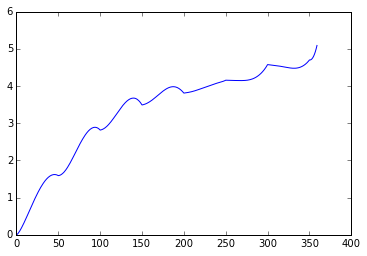

In [8]:
# this is the euclidean distance between real and estimate at xbig, ybig, zbig
mydholedb.table['assay']['err']=np.sqrt(((mydholedb.table['assay']['xb_real']-mydholedb.table['assay']['xb'])**2 + \
                                 (mydholedb.table['assay']['yb_real']-mydholedb.table['assay']['yb'])**2 + \
                                 (mydholedb.table['assay']['zb_real']-mydholedb.table['assay']['zb'])**2))

plt.plot(mydholedb.table['assay']['FROM'],mydholedb.table['assay']['err'])
mydholedb.survey

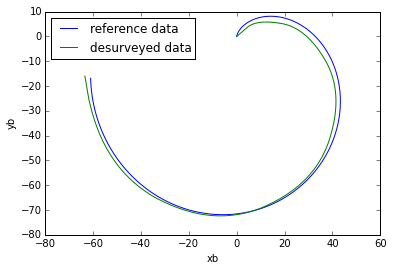

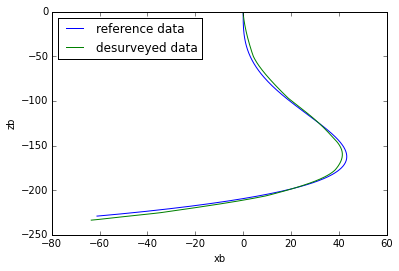

In [9]:
#plot drillhole
plt.plot (assay['xb_real'],assay['yb_real'], label= 'reference data')
plt.plot (assay['xm'],assay['ym'], label= 'desurveyed data')
plt.xlabel('xb')
plt.ylabel('yb')
plt.legend(loc=2)
plt.show()

plt.plot (assay['xb_real'],assay['zb_real'], label= 'reference data')
plt.plot (assay['xm'],assay['zm'], label= 'desurveyed data')
plt.xlabel('xb')
plt.ylabel('zb')
plt.legend(loc=2)
plt.show()


In [10]:
mydholedb.table['assay'][['FROM', 'R_AZM', 'azm', 'R_DIP', 'dipm', 'err','xb_real', 'xb', 'yb_real','yb', 'zb_real', 'zb']].tail(15)

,FROM,R_AZM,azm,R_DIP,dipm,err,xb_real,xb,yb_real,yb,zb_real,zb
345,345,345,346.049377,3.509749,3.371078,4.582800,-59.056525,-60.645142,-30.696893,-30.101585,-228.586861,-232.844086
346,346,346,346.949219,3.259053,3.123247,4.601799,-59.314858,-60.911118,-29.732778,-29.150166,-228.648080,-232.924652
347,347,347,347.836639,3.008357,2.875474,4.622855,-59.556389,-61.166161,-28.764052,-28.196747,-228.704930,-233.001160
348,348,348,348.711517,2.757660,2.627755,4.646153,-59.781030,-61.410633,-27.791025,-27.241619,-228.757412,-233.073578
349,349,349,349.573700,2.506964,2.380085,4.671884,-59.988701,-61.644878,-26.814010,-26.285088,-228.805524,-233.141861
350,350,350,350.000000,2.256267,2.256267,4.700281,-60.179328,-61.869255,-25.833322,-25.327393,-228.849264,-233.205963
351,351,351,350.000000,2.005571,2.256267,4.700281,-60.352841,-62.042770,-24.849278,-24.343348,-228.888633,-233.245331
352,352,352,350.000000,1.754875,2.256267,4.710203,-60.509180,-62.216282,-23.862195,-23.359304,-228.923630,-233.284698
353,353,353,350.000000,1.504178,2.256267,4.730249,-60.648288,-62.389797,-22.872391,-22.375259,-228.954254,-233.324066
354,354,354,350.000000,1.253482,2.256267,4.760747,-60.770115,-62.563309,-21.880187,-21.391216,-228.980504,-233.363434
